# One drug analysis

In the introduction we have analysed a IC50 input file. We performed a full analysis that is we analyse all associations between all drugs and 
all features. This may take a while and sometimes one is just interested in a single drug or a sub set of drugs. In this notebook, we show how to 
restrict the analysis.

In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (10,6)

Populating the interactive namespace from numpy and matplotlib


As before, we create an ANOVA instance. Pur input IC50 will be the test file

In [2]:
from gdsctools import ANOVA, ic50_test

In [3]:
an = ANOVA(ic50_test)

TISSUE FACTOR : included
MEDIA FACTOR : NOT included
MSI FACTOR : included
FEATURE FACTOR : included


Drugs are stored in the **drugIds** in case you forgot the drug you are interested in.. eg. the first drug identifer is 

In [4]:
drug_name = an.drugIds[0]

In [5]:
results = an.anova_one_drug(drug_name)

 [-----------------100%-----------------] 47 of 47 complete in 0.2 sec

Now, you can create an HTML report or simply call one of the volcano plot

/home/cokelaer/Work/virtualenv/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/cokelaer/Work/virtualenv/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


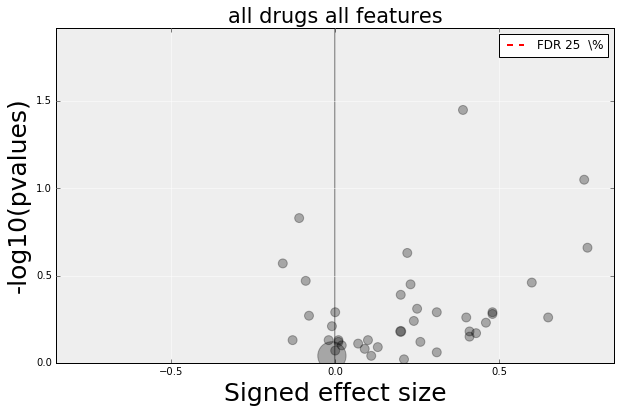

In [6]:
# These 4 lines are for the notebook only if mpld3 is enabled, 
# the matploltib figure does not show up
try:
    mpld3.disable_notebook()
except:
    pass

results.volcano()

In [7]:
import mpld3
mpld3.enable_notebook()
mpld3.display(results.handle_volcano.current_fig)
# 1. hover the mouse on circles to get more information.
# 2. in the bottom right corner you can find small icons to click on to focus in the images. Click again 
#    to be able to hover the mouse agains

/home/cokelaer/Work/virtualenv/lib/python2.7/site-packages/mpld3-0.2-py2.7.egg/mpld3/mplexporter/exporter.py:82: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


### DRAFT version to use new JS volcano plot (v 0.12)

In [13]:
from gdsctools.report import ReportMAIN
from gdsctools.volcano import VolcanoANOVA2
v = VolcanoANOVA2(results)

In [37]:
report = ReportMAIN(filename="test.html", 
                    template_filename="volcano_simple.html")
def dummy():pass
report._create_report =  dummy

In [38]:
report.jinja['volcano_jsdata'] = v.render_drug(999)

In [39]:
report.create_report(onweb=False)

openning report/test.html


In [40]:
from IPython.display import HTML

In [54]:
display(HTML('<iframe src="report/test.html" width="100%" height="60%"></iframe>'))